In [70]:
# -----------------------------------------------------------------------------------------------------
#   l1-q3, solving the trajectory of a charged particle in a uniform magnetic field
#   Author: Yi-Ming Ding
#   Updated: Mar 19, 2025
#   Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
# -----------------------------------------------------------------------------------------------------

The equation of motion for a charged particle in a uniform magnetic field is
$$
\frac{d\vec{v}}{dt}=\vec{v}\times \mathbf{\omega}
$$
where $\omega=q\vec{B}/m$.

Suppose $\vec{B}$ is along the $z$-axis, then we have
$$
\frac{dx}{dt}=v_x,\frac{dy}{dt}=v_y,\frac{dz}{dt}=v_z,\frac{dv_x}{dt}=\omega v_y,\frac{dv_y}{dt}=-\omega v_x,\frac{dv_z}{dt}=0
$$

For convenience, we define $\mathbf{y}=[x,y,z,v_x,v_y,v_z]$

In [71]:
q = 1.0     # the charge
B = 1.0     # the strength of magnetic field
m = 1.0     # the mass of the particle
omega = q * B / m
initial_conditions = [0, 0, 0, 1, 0, 1]       # for y

In [72]:

def particle_motion(t, y):
    """
    :param t: the time
    :param y: the single vector defined above
    :return: the system of equations
    """
    x, y, z, v_x, v_y, v_z = y

    # list the six equations
    dx_dt = v_x
    dy_dt = v_y
    dz_dt = v_z

    dvx_dt = omega * v_y
    dvy_dt = -omega * v_x
    dvz_dt = 0

    return [dx_dt, dy_dt, dz_dt, dvx_dt, dvy_dt, dvz_dt]

In [73]:
import numpy as np
from scipy.integrate import solve_ivp

t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# Solve the system
solution = solve_ivp(particle_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution
x, y, z = solution.y[0], solution.y[1], solution.y[2]

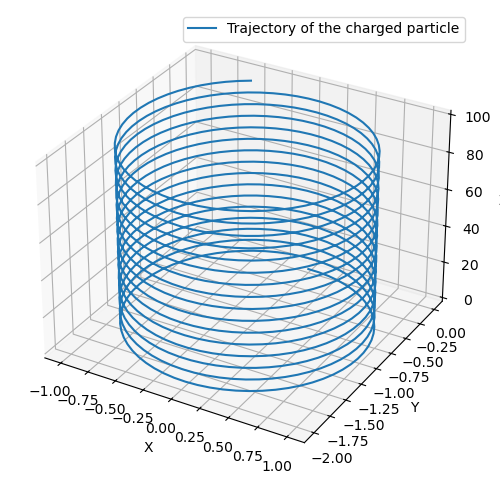

In [74]:
import matplotlib.pyplot as plt
# Plot the trajectory
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Trajectory of the charged particle")

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

# Show the plot
plt.show()